In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the dataset
df = pd.read_csv(r'C:\Users\KIIT\Desktop\8th sem project\student-por.csv')

# Selecting relevant features
features = ['age', 'Medu', 'Fedu', 'studytime', 'failures', 'freetime', 
            'goout', 'Dalc', 'Walc', 'health', 'absences']
target = 'G3'

# Encode categorical features
categorical_features = ['schoolsup', 'famsup', 'higher']
for col in categorical_features:
    if col in df.columns:
        df[col] = df[col].map({'yes': 1, 'no': 0})

X = df[features]
y = df[target]

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build ANN model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='huber_loss', metrics=['mae'])

# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error on test data: {mae}')

# Predicting Function
def predict_performance(new_data):
    new_data_df = pd.DataFrame([new_data], columns=features)
    new_data_scaled = scaler.transform(new_data_df)
    prediction = model.predict(new_data_scaled)
    return round(prediction[0][0])

# Example prediction
new_student = [18, 4, 4, 2, 0, 3, 3, 1, 1, 5, 4]
predicted_score = predict_performance(new_student)
print(f'Predicted Final Grade (G3): {predicted_score}')


Epoch 1/150
33/33 [==============================] - 3s 22ms/step - loss: 8.5950 - mae: 8.9455 - val_loss: 4.8926 - val_mae: 5.2285
Epoch 2/150
33/33 [==============================] - 0s 8ms/step - loss: 3.3761 - mae: 3.6973 - val_loss: 2.6955 - val_mae: 3.0004
Epoch 3/150
33/33 [==============================] - 0s 8ms/step - loss: 3.0048 - mae: 3.3215 - val_loss: 2.3760 - val_mae: 2.6909
Epoch 4/150
33/33 [==============================] - 0s 8ms/step - loss: 2.8817 - mae: 3.1997 - val_loss: 2.2899 - val_mae: 2.6077
Epoch 5/150
33/33 [==============================] - 0s 8ms/step - loss: 2.8231 - mae: 3.1393 - val_loss: 2.3944 - val_mae: 2.7102
Epoch 6/150
33/33 [==============================] - 0s 8ms/step - loss: 2.7335 - mae: 3.0525 - val_loss: 2.2843 - val_mae: 2.5975
Epoch 7/150
33/33 [==============================] - 0s 8ms/step - loss: 2.5464 - mae: 2.8619 - val_loss: 2.3605 - val_mae: 2.6766
Epoch 8/150
33/33 [==============================] - 0s 8ms/step - loss: 2.4473 - 

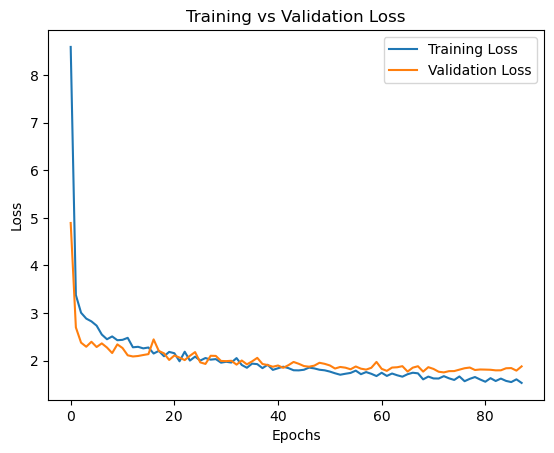

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()